# Name - Sayak Chakraborty    ID - 220213727

**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Read the Amazon Reviews CSV File**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


**Remove null values from the dataset**

In [ ]:
df.dropna(inplace=True)

**We focus on only Text and Score**

In [ ]:
df = df[['Text', 'Score']]

**Assign Labels**

In [ ]:
def sentiment_label(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(sentiment_label)

df['Sentiment'].value_counts()

,count
Sentiment,
Positive,443756
Negative,82007
Neutral,42638


**Data Processing**

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

df.dropna(subset=['Text'], inplace=True)
df['Text'] = df['Text'].astype(str)

df['Text'] = df['Text'].str.lower()

df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x).strip())

df['Text'] = df['Text'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])

lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df['Cleaned_Text'] = df['Text'].apply(lambda x: ' '.join(x))

df = df[['Cleaned_Text', 'Sentiment']]

df.to_csv('/content/Amazon_Reviews_Clean.csv', index=False)

from google.colab import files
files.download('/content/Amazon_Reviews_Clean.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Frequent Words in the Text**

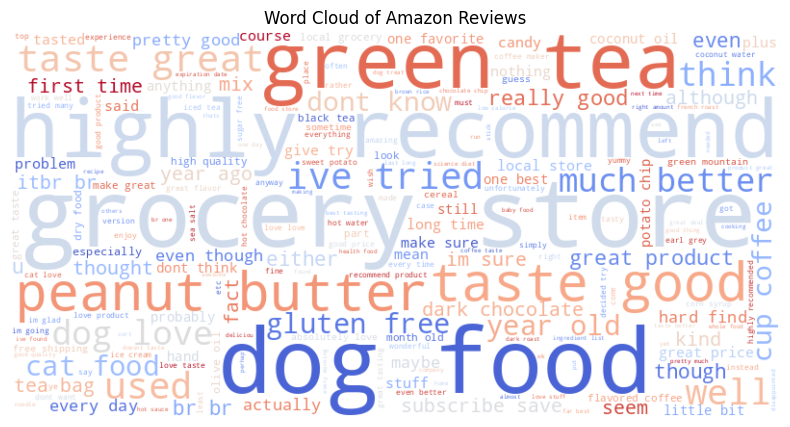

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/content/drive/MyDrive/Amazon_Reviews_Clean.csv')

df.dropna(subset=["Cleaned_Text"], inplace=True)
df["Cleaned_Text"] = df["Cleaned_Text"].str.lower()

text = " ".join(review for review in df["Cleaned_Text"])

wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="coolwarm", max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Amazon Reviews")
plt.show()

**Feature Extraction**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/content/drive/MyDrive/Amazon_Reviews_Clean.csv')

df.dropna(subset=['Cleaned_Text'], inplace=True)
df['Cleaned_Text'] = df['Cleaned_Text'].astype(str)
df = df.sample(n=568400, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
print("Fitting Vectorizer...")
X = vectorizer.fit_transform(df['Cleaned_Text'])

print("Shape of theMatrix (568,400 samples):", X.shape)

Fitting Vectorizer...
Shape of theMatrix (568,400 samples): (568400, 10000)


 **Map Labels**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['Sentiment'])

label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


**Original Sentiment Distribution**

<ipython-input-11-abe463cc882e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


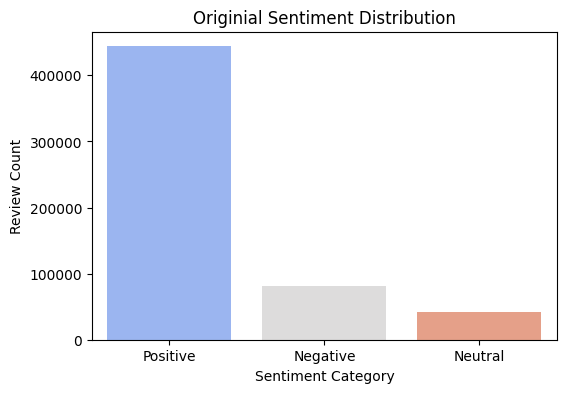

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Sentiment'], palette='coolwarm')
plt.title("Originial Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy={2: 120000}, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

print("Class Distribution After Undersampling:", Counter(y_resampled))

Class Distribution After Undersampling: Counter({2: 120000, 0: 82007, 1: 42638})


**Original Sentiment Distribution after Undersampling**

<ipython-input-13-35fdedaa6f13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=resampled_df['Sentiment'], palette='coolwarm')


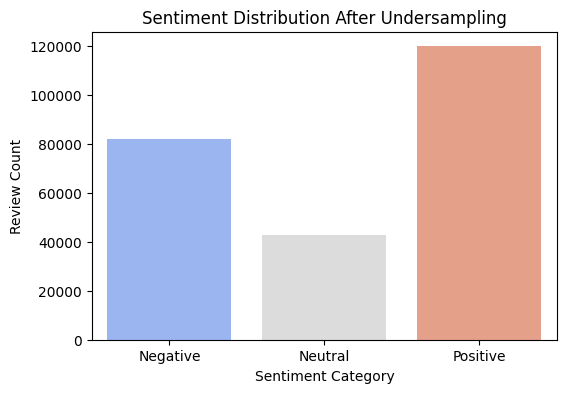

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

resampled_df = pd.DataFrame({'Sentiment': encoder.inverse_transform(y_resampled)})

plt.figure(figsize=(6,4))
sns.countplot(x=resampled_df['Sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution After Undersampling")
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.show()

**Split Train and Test Dataset into 80:20 ratio**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (195716, 10000)
Testing Data Shape: (48929, 10000)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Model Training Complete")

log_reg_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")

print(classification_report(y_test, y_pred_log))

Logistic Regression Model Training Complete
Logistic Regression Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.75      0.77     16230
           1       0.47      0.66      0.55      8473
           2       0.90      0.81      0.85     24226

    accuracy                           0.76     48929
   macro avg       0.72      0.74      0.73     48929
weighted avg       0.79      0.76      0.77     48929



**SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = LinearSVC(C=0.5,class_weight='balanced')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Model Training Complete")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

print(classification_report(y_test, y_pred_svm))

SVM Model Training Complete
SVM Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     16230
           1       0.53      0.54      0.54      8473
           2       0.87      0.86      0.86     24226

    accuracy                           0.78     48929
   macro avg       0.73      0.73      0.73     48929
weighted avg       0.78      0.78      0.78     48929



**Model Accuracy Comparison**

<ipython-input-16-06e9c57de6c2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="coolwarm")


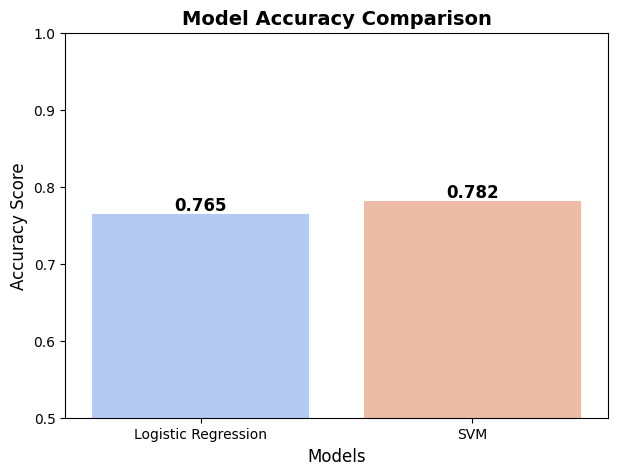

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Logistic Regression', 'SVM']
accuracies = [log_reg_accuracy, svm_accuracy]

plt.figure(figsize=(7, 5))

sns.barplot(x=model_names, y=accuracies, palette="coolwarm")

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0.5, 1)

plt.show()

**Confusion Matrix of Logistic Regression and SVM**

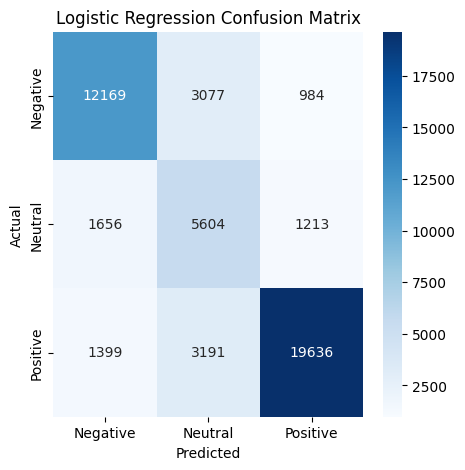

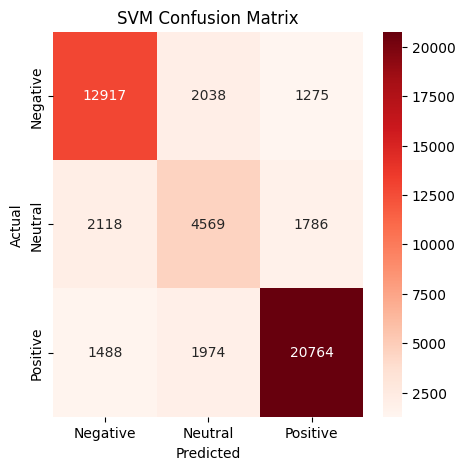

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_log_reg = confusion_matrix(y_test, y_pred_log)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()